# Figure 3: 
# effect of attack models on diameter


In [1]:
import pandas as pd 
import networkx as nx
import os
import random
from random import sample

def read_graph2(g, v):
    file_name = f'standard networks dataset{datasets[int(g)]}'
    G = nx.Graph()
    if v=='Karate':
        G = nx.karate_club_graph()
    elif v=='Erdos Renyi':
        # nodes = int(input("enter number of nodes?"))
        # edges= int(input("enter number of edges?"))
        G = nx.gnm_random_graph(500, 1500)
    elif v=='Barabasi_albert_graph':
        # nodes = int(input("enter number of nodes?"))
        # edges= int(input("enter number of edges?"))
        # p = int(input("enter P value?"))
        G = nx.barabasi_albert_graph(500, 3)
    else:
        ext = os.path.splitext(file_name)[1]
        if ext=='.edges':
            G = nx.read_adjlist(file_name, create_using = nx.Graph(), nodetype = int)
        elif ext=='.gml':
            G = nx.read_gml(file_name)
        elif ext=='.mtx':
            G = None
            #matrix = scipy.io.mmread(file_name)
            #G = nx.from_scipy_sparse_matrix(matrix)
        elif ext=='.txt':
            file = open(file_name, 'r')
            lines=  file.readlines()
            G = nx.Graph()
            for line in lines:
                if " " in line:
                    N = line.split(" ")
                else:
                    N = line.split("\t")
                G.add_edge(N[0], N[1])
    return G


names = [ 'dolphins',
          'polbooks',
          'word_adjacencies',
          'arenas-email',
             'Karate',
             'Erdos Renyi',
#              'USAir97',
             'circuits s208',
             'circuits s420',
             'circuits s838',
             'E. Coli',
             'Barabasi_albert_graph',
             'facebook 0',
             'facebook 107',
             'facebook 348',
             'facebook 414',
             'facebook 686',
             'facebook 1684',
#              'bio-celegans',
             'bn-macaque-rhesus_brain_2',
             'soc-tribes',
             'fb-pages-food',
             'bn-cat-mixed-species_brain_1',
#              'ca-sandi_auths',
             'soc-firm-hi-tech']

datasets = [ '/dolphins/dolphins.gml',
             '/polbooks/out2.txt',
             '/word_adjacencies.gml/word_adjacencies.gml',
             '/arenas-email/out2.txt',
             'Karate',
             'Erdos Renyi',
#              '/USAir97/USAir97.mtx',
             '/circuits/s208_st.txt',
             '/circuits/s420_st.txt',
             '/circuits/s838_st.txt',
             '/E. Coli/E. Coli.txt',
             'Barabasi_albert_graph',
             '/facebook/0.edges',
             '/facebook/107.edges',
             '/facebook/348.edges',
             '/facebook/414.edges',
             '/facebook/686.edges',
             '/facebook/1684.edges',
#              '/bio-celegans/bio-celegans.mtx',
             '/bn-macaque-rhesus_brain_2/bn-macaque-rhesus_brain_2.txt',
             '/soc-tribes/soc-tribes.txt',
             '/fb-pages-food/fb-pages-food.txt',
             '/bn-cat-mixed-species_brain_1/bn-cat-mixed-species_brain_1.txt',
#              '/ca-sandi_auths/ca-sandi_auths.mtx',
             '/soc-firm-hi-tech/soc-firm-hi-tech.txt']

# read the networks
networks = []
for i,v in enumerate(names):
    network = {}
    network['name'] = v
    network['path'] = datasets[i]
    network['graph'] = read_graph2(i, v)
    networks.append(network)
networks



[{'name': 'dolphins',
  'path': '/dolphins/dolphins.gml',
  'graph': <networkx.classes.graph.Graph at 0x7f70343f2070>},
 {'name': 'polbooks',
  'path': '/polbooks/out2.txt',
  'graph': <networkx.classes.graph.Graph at 0x7f70343f20d0>},
 {'name': 'word_adjacencies',
  'path': '/word_adjacencies.gml/word_adjacencies.gml',
  'graph': <networkx.classes.graph.Graph at 0x7f6fbc8e18b0>},
 {'name': 'arenas-email',
  'path': '/arenas-email/out2.txt',
  'graph': <networkx.classes.graph.Graph at 0x7f6fbc8f1700>},
 {'name': 'Karate',
  'path': 'Karate',
  'graph': <networkx.classes.graph.Graph at 0x7f6fbc92b910>},
 {'name': 'Erdos Renyi',
  'path': 'Erdos Renyi',
  'graph': <networkx.classes.graph.Graph at 0x7f6fbcca7340>},
 {'name': 'circuits s208',
  'path': '/circuits/s208_st.txt',
  'graph': <networkx.classes.graph.Graph at 0x7f6fbc99b580>},
 {'name': 'circuits s420',
  'path': '/circuits/s420_st.txt',
  'graph': <networkx.classes.graph.Graph at 0x7f6fbc8858b0>},
 {'name': 'circuits s838',
  '

In [2]:
networks

[{'name': 'dolphins',
  'path': '/dolphins/dolphins.gml',
  'graph': <networkx.classes.graph.Graph at 0x7f70343f2070>},
 {'name': 'polbooks',
  'path': '/polbooks/out2.txt',
  'graph': <networkx.classes.graph.Graph at 0x7f70343f20d0>},
 {'name': 'word_adjacencies',
  'path': '/word_adjacencies.gml/word_adjacencies.gml',
  'graph': <networkx.classes.graph.Graph at 0x7f6fbc8e18b0>},
 {'name': 'arenas-email',
  'path': '/arenas-email/out2.txt',
  'graph': <networkx.classes.graph.Graph at 0x7f6fbc8f1700>},
 {'name': 'Karate',
  'path': 'Karate',
  'graph': <networkx.classes.graph.Graph at 0x7f6fbc92b910>},
 {'name': 'Erdos Renyi',
  'path': 'Erdos Renyi',
  'graph': <networkx.classes.graph.Graph at 0x7f6fbcca7340>},
 {'name': 'circuits s208',
  'path': '/circuits/s208_st.txt',
  'graph': <networkx.classes.graph.Graph at 0x7f6fbc99b580>},
 {'name': 'circuits s420',
  'path': '/circuits/s420_st.txt',
  'graph': <networkx.classes.graph.Graph at 0x7f6fbc8858b0>},
 {'name': 'circuits s838',
  '

In [3]:
def plot(data, title):
    import matplotlib.pyplot as plt
    # Extract the names and lists from the dictionary
    names = list(data.keys())
    lists = list(data.values())

    # Define a list of markers
    markers = ['+', 'x', 'o', 's', 'd', 'D', '*', '+', 'x', 'o', 's', 'd', 'D', '*','+', 'x', 'o', 's', 'd', 'D', '*']

    # Plot the lists with markers
    for name, lst, marker in zip(names, lists, markers):
        plt.plot(lst, label=name, marker=marker)

    # Add labels and legend
    plt.xlabel('Data Points')
    plt.ylabel('Values')
    plt.title(title)
    plt.legend()
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # Show the plot
    plt.show()

In [4]:
import networkx as nx
import random

def calculate_diameter(G):
    try:
        return nx.diameter(G)
    except nx.NetworkXError:
        return float('inf')

def delete_random_node(G):
    node = random.choice(list(G.nodes()))
    G.remove_node(node)

def calculate_assortativity(G):
    return nx.degree_assortativity_coefficient(G)

def calculate_modularity(G):
    return nx.algorithms.community.modularity(G, nx.algorithms.community.label_propagation.label_propagation_communities(G))

def main(G):

    # Step 2: Use the LCC of G
    lcc = max(nx.connected_components(G), key=len)
    G = G.subgraph(lcc).copy()

    # Step 3: Iteratively delete random nodes from LCC and calculate diameter

    diameter = calculate_diameter(G)
    a = calculate_assortativity(G)
    m = calculate_modularity(G)
    results = [diameter]
    assort  = [a]
    modula  = [m]
    while diameter != float('inf') and diameter>= results[-1]:
        results.append(diameter)
        assort.append(a)
        modula.append(m)
        delete_random_node(G)
        diameter = calculate_diameter(G)
        try:
            a = calculate_assortativity(G)
        except nx.NetworkXError:
            a = 0
        m = calculate_modularity(G)
    
    return results, assort, modula


results = {}
resultsA = {}
resultsM = {}

for network in networks:
    print(network['name'])
    GN = network['name']
    results[GN], resultsA[GN], resultsM[GN] = main(network['graph'])






dolphins
polbooks
word_adjacencies
arenas-email
Karate
Erdos Renyi
circuits s208
circuits s420
circuits s838
E. Coli


KeyboardInterrupt: 

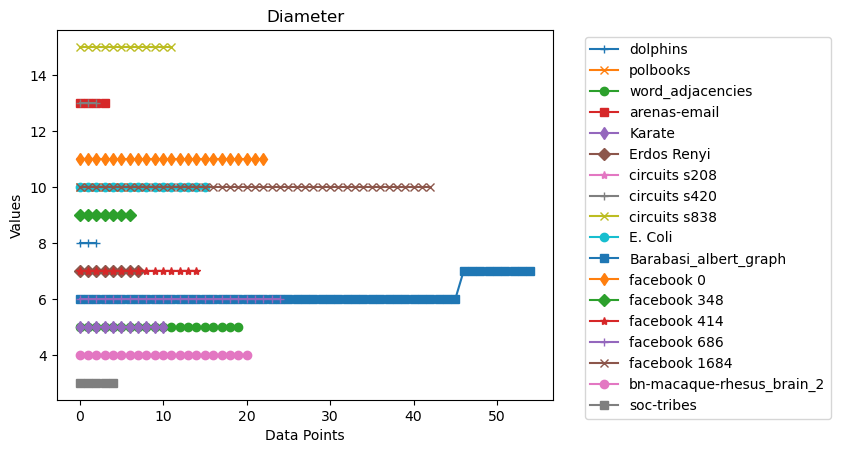

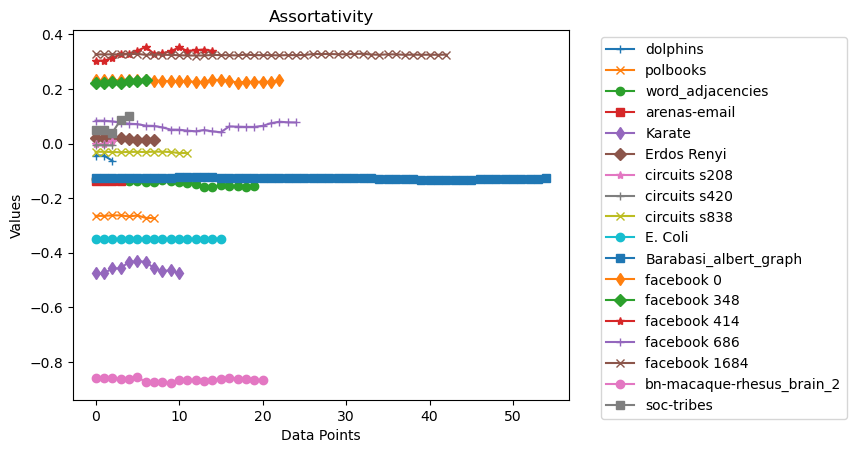

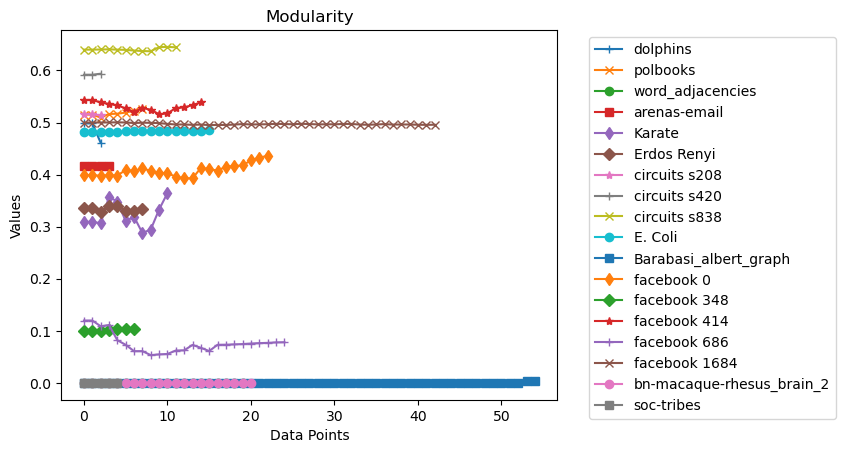

In [ ]:
plot(results, 'Diameter')
plot(resultsA,'Assortativity')
plot(resultsM,'Modularity')